In [6]:
#Question 1 part d
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#parameters
gam = 4
x0 = 10
Ns = [100, 1000, 10000]

#normalizing constant C = (gam - 1) * x0^(gam - 1)
C = (gam - 1) * (x0 ** (gam - 1))

In [14]:
#function for inverse sample
def sample_power_law(n, gam, x0, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    U = rng.uniform(0.0, 1.0, size=n)
    X = x0 * (1 - U) ** (-1.0 / (gam - 1))
    return X

#function for theoretical pdf
def pdf_power_law(x, gam, x0):
    C = (gam - 1) * (x0 ** (gam - 1))
    return np.where(x >= x0, C * x ** (-gam), 0.0)

In [15]:
#grid for theoretical pdf 
x_grid = np.linspace(0, 60, 2000)
pdf_grid = pdf_power_law(x_grid, gam, x0)

/var/folders/gq/h1h8jf9s2ljgh3cq6yfxgcbm0000gn/T/ipykernel_2955/4003906979.py:10: RuntimeWarning: divide by zero encountered in power
  return np.where(x >= x0, C * x ** (-gam), 0.0)


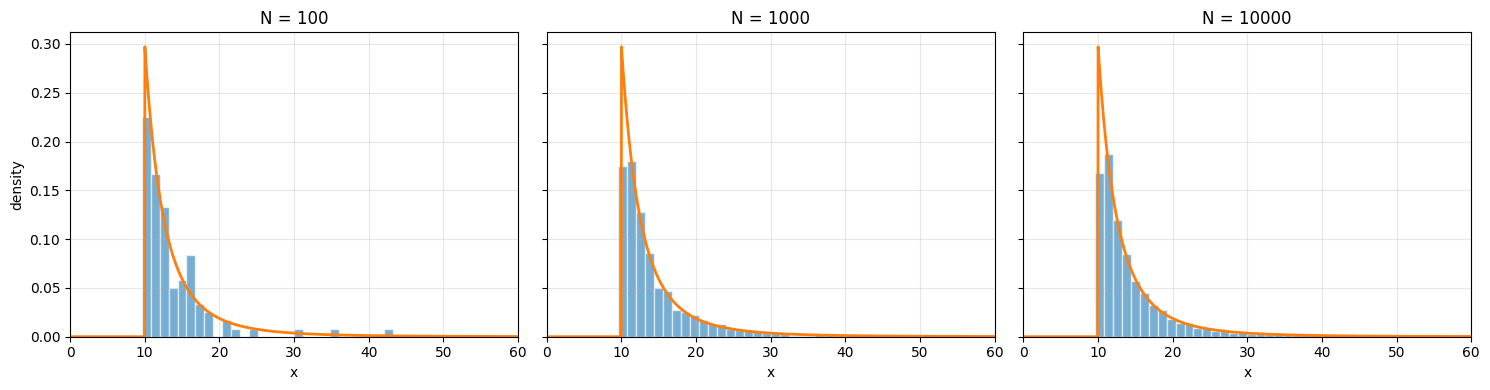

In [17]:
rng = np.random.default_rng(777)
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

#plot
for ax, N in zip(axes, Ns):
    X = sample_power_law(N, gam, x0, rng=rng)

    #histogram normalized to area 1:
    #density=True makes the histogram integrate to ~1 over the plotted range
    ax.hist(X, bins=50, range=(0, 60), density=True, alpha=0.6, edgecolor='white')

    #pdf overlay
    ax.plot(x_grid, pdf_grid, linewidth=2)

    ax.set_title(f"N = {N}")
    ax.set_xlim(0, 60)
    ax.set_xlabel("x")
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel("density")
plt.tight_layout()
plt.savefig("pbm1.png", dpi=300, bbox_inches="tight")
plt.show()